# [E-08] News Summarization
## 뉴스 요약봇 만들기

### 학습 목표
* Extractive/Abstractive summarization 이해하기
* 단어장 크기를 줄이는 다양한 text normalization 적용해보기
* seq2seq의 성능을 Up시키는 Attention Mechanism 적용하기


### 목차
#### 1.  들어가며   
  1-1. 텍스트 요약(Text Summarization)     
  1-2. 추출적 요약(Extractive Summarization)    
  1-3. 추상적 요약(Abstractive Summarization)    
  1-4. seq2seq(Sequence-to-sequence)    
  1-5. 어텐션(Attention)   
  1-6. Summa의 summarize( )   
#### 2. 뉴스 요약 봇 만들기
  2-1. 데이터 수집하기    
  2-2. 데이터 전처리하기 (추상적 요약)    
  2-3. 전체 text 데이터에 대한 전처리    
  2-4. 훈련데이터와 테스트데이터 나누기    
  2-5. 데이터 전처리: 정수 인코딩    
  2-6. 모델 설계하기    
  2-7. 어텐션 메커니즘 사용하기 (추상적 요약)    
  2-8. 모델 훈련하기    
  2-9. 실제 결과와 요약문 비교하기 (추상적 요약)    
  2-10. Summa을 이용해서 추출적 요약해보기        
#### 3. 회고
  3-1. 최종정리      
  3-2. 이번 프로젝트에서 어려웠던 점      
  3-3. 프로젝트를 진행하면서 알아낸 점, 혹은 아직 모호한 점      
  3-4. 앞으로 더 공부할 내용      
  3-5. 참고사이트      

<br/>


### 루브릭 평가 기준
|평가문항|상세기준|
|:---|:---|
|1. Abstractive 모델 구성을 위한 텍스트 전처리 단계가 체계적으로 진행되었다.|분석단계, 정제단계, 정규화와 불용어 제거, 데이터셋 분리, 인코딩 과정이 빠짐없이 체계적으로 진행되었다.|
|2. 텍스트 요약모델이 성공적으로 학습되었음을 확인하였다.|모델학습이 안정적으로 수렴되었음을 그래프를 통해 확인하였으며, 실제 요약문과 유사한 요약문장을 얻을 수 있었다.|
|3. Extractive 요약을 시도해 보고 Abstractive 요약 결과과 함께 비교해 보았다.|두 요약 결과를 문법완성도 측면과 핵심단어 포함 측면으로 나누어 비교분석 결과를 제시하였다.|   
<br/>

----

## 1. 들어가며
### 1-1. 텍스트 요약(Text Summarization)
* 긴 길이의 문서(Document) 원문을 핵심 주제만으로 구성된 짧은 요약(Summary)문장들로 변환하는 것을 말함

* 요약 전후 정보 손실 발생이 최소화되어야함
* 정보를 압축하는 과정과 같음
* 텍스트의 길이가 크게 줄어들었어도, 요약문은 문서 원문이 담고 있는 정보를 최대한 보존하고 있어야 함

### 1-2. 추출적 요약(Extractive Summarization)
* 단어 그대로 원문에서 문장들을 추출해서 요약하는 방식
* 딥 러닝보다는 주로 전통적인 머신럴닝 방식에 속하는 텍스트 랭크(TextRank)와 같은 알고리즘에서 이 방법 사용
* 네이버 뉴스 요약봇

### 1-3. 추상적 요약(Abstractive Summarization)
* 원문으로부터 내용이 요약된 새로운 문장을 생성해내는 방식
* 결과로 나온 문장이 원문에는 원래 없던 문장일 수도 있음
* 자연어 생성(Natural Language Generation, NLG) 영역
* 추출적 요약은 원문을 구성하는 문장 중 어느 것이 요약문에 들어갈 핵심문장인지를 판별한다는 점에서 문장 분류(Text Classification) 문제로 볼 수 있음

> **Q1. RNN은 학습 데이터의 길이가 길어질수록 먼 과거의 정보를 현재에 전달하기 어렵다는 문제가 있습니다. 이 문제를 해결하기 위해 LSTM과 GRU가 등장했고, 이 둘도 부족해서 어텐션(Attention) 메커니즘이 등장했지요. 이 문제의 이름은 무엇인가요?**
>
> 장기 의존성(long term dependencies) 문제

### 1-4. seq2seq(Sequence-to-sequence)
* 두 개의 RNN 아키텍쳐를 사용하여 입력 시퀀스로부터 출력 시퀀스를 생성해내는 자연어 생성 모델
* 짧은 문장, 요약문을 생성하는 모델을 딥 러닝을 통해 end-to-end로 설계
* seq2seq 구조   
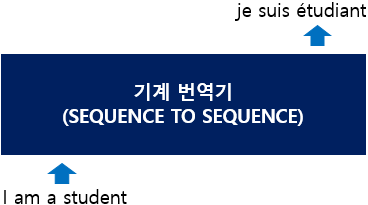
* seq2seq 내부 구조
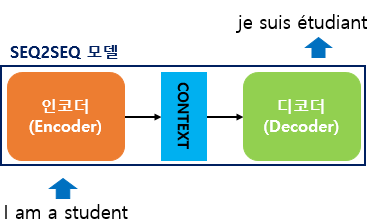

* 구글이 메일서비스에 적용한 자동 회신(SmartReply) 기능을 만든 것과 비슷한 딥러닝 기법이기도 한 인코더와 디코더의 구조로 구성된 딥러닝 아키텍쳐

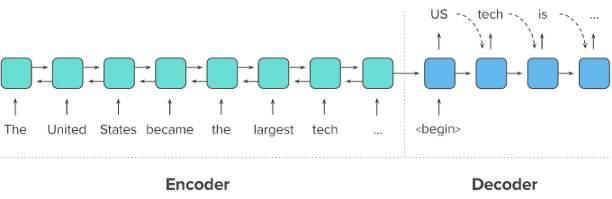

* 원문을 첫 번째 RNN인 인코더로 입력하면, 인코더는 이를 하나의 고정된 벡터로 변환함
* 이 벡터를 문맥 정보를 가지로 있는 벡터라고 함 = 컨텍스트 벡터(Context Vector)
* 두 번째 RNN인 디코더는 이 컨텍스트 벡터를 전달받아 한 단어씩 생성해내서 요약 문장을 완성
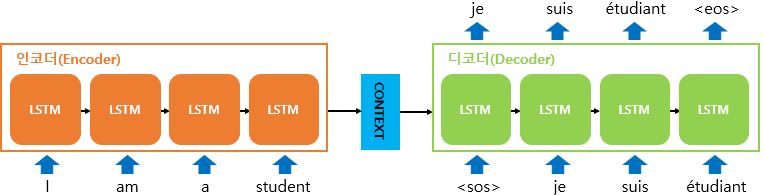

#### RNN에 기반한 seq2seq 모델의 문제
* 하나의 고정된 크기의 벡터에 모든 정보를 압축하려고 하니까 정보 손실이 발생
* RNN의 고질적인 문제인 기울기 소실(vanishing gradient) 문제가 존재

### 1-5. 어텐션(Attention) 
* 입력 시퀀스가 길어지면 출력 시퀀스의 정확도가 떨어지는 것을 보정해주기 위한 등장한 기법
* 디코더에서 출력 단어를 예측하는 매 시점(time step)마다, 인코더에서의 전체 입력 문장을 다시 한 번 참고
* 단, 전체 입력 문장을 전부 다 동일한 비율로 참고하는 것이 아니라, 해당 시점에서 예측해야할 단어와 연관이 있는 입력 단어 부분을 좀 더 집중(attention)


### 1-6. Summa의 summarize( )
* summarize( ) 함수의 인자
  * text (str) : 요약할 테스트.
  * ratio (float, optional) – 요약문에서 원본에서 선택되는 문장 비율. 0~1 사이값
  * words (int or None, optional) – 출력에 포함할 단어 수.
  * 만약, ratio와 함께 두 파라미터가 모두 제공되는 경우 ratio는 무시한다.
  * split (bool, optional) – True면 문장 list / False는 조인(join)된 문자열을 반환

----


#### 필요한 라이브러리 가져오기

In [1]:
import nltk
nltk.download('stopwords')

import numpy as np
import pandas as pd
import os
import re
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from bs4 import BeautifulSoup 
from tensorflow.keras.preprocessing.text import Tokenizer 
from tensorflow.keras.preprocessing.sequence import pad_sequences
import urllib.request
import warnings
warnings.filterwarnings("ignore", category=UserWarning, module='bs4')

print('=3')

[nltk_data] Downloading package stopwords to /aiffel/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


=3


### 2-1. 데이터 수집하기

* sunnysai12345/News_Summary     
https://github.com/sunnysai12345/News_Summary


In [2]:
urllib.request.urlretrieve("https://raw.githubusercontent.com/sunnysai12345/News_Summary/master/news_summary_more.csv", filename="news_summary_more.csv")
data = pd.read_csv('news_summary_more.csv', encoding='iso-8859-1')

In [3]:
data.sample(10)

,headlines,text
12873,Pregnant woman dies as militants attack J&K ar...,A pregnant woman died in cross-firing after mi...
12333,"Kohli took just 11 innings to go from 9,000 to...","Virat Kohli, who became the fastest batsman to..."
82681,"NASA probe shoots Saturnian dawn, completes 13...","NASA's Cassini probe, first man-made object to..."
75392,"Allah is the owner of mosques, not Maulana: As...",AIMIM chief Asaduddin Owaisi has said that mos...
53420,White House to screen Meryl Streep's film 'The...,"As per reports, US President Donald Trump's te..."
3290,Parliamentary panel asks RBI to fix dysfunctio...,A parliamentary panel has asked the Reserve Ba...
77960,UFC champion thanks Salman Khan for hospitality,"UFC welterweight champion Tyron Woodley, who p..."
40189,Canada files WTO challenge against US' metal t...,Canada has filed a World Trade Organisation (W...
12722,Audi's 1st electric SUV delayed by a month ove...,Audi's electric sport utility vehicle (SUV) 'e...
45395,Getting WhatsApp messages that polls are in It...,BJP President Amit Shah on Saturday joked that...


* text 열의 내용을 요약한 것이 headlines 열
* 인공 신경망을 통해 text 시퀀스를 입력받으면, headlines 시퀀스를 예측하도록 인공 신경망을 훈련시킬 것

---


### 2-2. 데이터 전처리하기 (추상적 요약)

#### 중복 샘플과 NULL값이 존재하는 샘플 제거

#### 중복 샘플 유무 확인


In [4]:
print('text 열에서 중복을 배제한 유일한 샘플의 수 :', data['text'].nunique())
print('headlines 열에서 중복을 배제한 유일한 샘플의 수 :', data['headlines'].nunique())

text 열에서 중복을 배제한 유일한 샘플의 수 : 98360
headlines 열에서 중복을 배제한 유일한 샘플의 수 : 98280


#### 데이터프레임의 drop_duplicates( ) 함수를 이용해서 중복 샘플 제거

In [5]:
data.drop_duplicates(subset = ['text'], inplace=True)
print('전체 샘플수 :', (len(data)))

전체 샘플수 : 98360


#### 데이터에 NULL 값이 남아있는지 확인하기

In [6]:
print(data.isnull().sum())

headlines    0
text         0
dtype: int64


In [7]:
data.dropna(axis=0, inplace=True)
print('전체 샘플수 :', (len(data)))

전체 샘플수 : 98360


* 데이터프레임에서 Null값을 제거할 때는 dropna( ) 함수 사용 가능

#### 텍스트 정규화와 불용어 제거
* it'll = it will
* mustn't = must not

* 텍스트 정규화(text normalization)
  * 기계가 다른 단어로 간주하게 해서 연산량을 늘리는 것보다 기계 학습 전에 미리 같은 표현으로 통일시켜주는 것이 기계의 연산량을 줄일 수 있음 



In [8]:
contractions = {"ain't": "is not", "aren't": "are not","can't": "cannot", "'cause": "because", "could've": "could have", "couldn't": "could not",
                           "didn't": "did not",  "doesn't": "does not", "don't": "do not", "hadn't": "had not", "hasn't": "has not", "haven't": "have not",
                           "he'd": "he would","he'll": "he will", "he's": "he is", "how'd": "how did", "how'd'y": "how do you", "how'll": "how will", "how's": "how is",
                           "I'd": "I would", "I'd've": "I would have", "I'll": "I will", "I'll've": "I will have","I'm": "I am", "I've": "I have", "i'd": "i would",
                           "i'd've": "i would have", "i'll": "i will",  "i'll've": "i will have","i'm": "i am", "i've": "i have", "isn't": "is not", "it'd": "it would",
                           "it'd've": "it would have", "it'll": "it will", "it'll've": "it will have","it's": "it is", "let's": "let us", "ma'am": "madam",
                           "mayn't": "may not", "might've": "might have","mightn't": "might not","mightn't've": "might not have", "must've": "must have",
                           "mustn't": "must not", "mustn't've": "must not have", "needn't": "need not", "needn't've": "need not have","o'clock": "of the clock",
                           "oughtn't": "ought not", "oughtn't've": "ought not have", "shan't": "shall not", "sha'n't": "shall not", "shan't've": "shall not have",
                           "she'd": "she would", "she'd've": "she would have", "she'll": "she will", "she'll've": "she will have", "she's": "she is",
                           "should've": "should have", "shouldn't": "should not", "shouldn't've": "should not have", "so've": "so have","so's": "so as",
                           "this's": "this is","that'd": "that would", "that'd've": "that would have", "that's": "that is", "there'd": "there would",
                           "there'd've": "there would have", "there's": "there is", "here's": "here is","they'd": "they would", "they'd've": "they would have",
                           "they'll": "they will", "they'll've": "they will have", "they're": "they are", "they've": "they have", "to've": "to have",
                           "wasn't": "was not", "we'd": "we would", "we'd've": "we would have", "we'll": "we will", "we'll've": "we will have", "we're": "we are",
                           "we've": "we have", "weren't": "were not", "what'll": "what will", "what'll've": "what will have", "what're": "what are",
                           "what's": "what is", "what've": "what have", "when's": "when is", "when've": "when have", "where'd": "where did", "where's": "where is",
                           "where've": "where have", "who'll": "who will", "who'll've": "who will have", "who's": "who is", "who've": "who have",
                           "why's": "why is", "why've": "why have", "will've": "will have", "won't": "will not", "won't've": "will not have",
                           "would've": "would have", "wouldn't": "would not", "wouldn't've": "would not have", "y'all": "you all",
                           "y'all'd": "you all would","y'all'd've": "you all would have","y'all're": "you all are","y'all've": "you all have",
                           "you'd": "you would", "you'd've": "you would have", "you'll": "you will", "you'll've": "you will have",
                           "you're": "you are", "you've": "you have"}

print("정규화 사전의 수: ", len(contractions))

정규화 사전의 수:  120


#### 데이터 전처리 
* 텍스트 소문자화
```python
sentence = sentence.lower()
```
* ```<br />, <a href = ...> ```등의 html 태그 제거
```python
sentence = BeautifulSoup(sentence, "lxml").text 
``` 
* 괄호로 닫힌 문자열 (...) 제거 Ex) my husband (and myself!) for => my husband for
```python
sentence = re.sub(r'\([^)]*\)', '', sentence)
```
* 쌍따옴표 " 제거
```python
sentence = re.sub('"','', sentence)
```
* 약어 정규화
```python
sentence = ' '.join([contractions[t] if t in contractions else t for t in sentence.split(" ")])
```
* 소유격 제거. Ex) roland's -> roland
```python
sentence = re.sub(r"'s\b","", sentence)
```
* 영어 외 문자(숫자, 특수문자 등) 공백으로 변환
```python
sentence = re.sub("[^a-zA-Z]", " ", sentence)
```
* m이 3개 이상이면 2개로 변경. Ex) ummmmmmm yeah -> umm yeah
```python
sentence = re.sub('[m]{2,}', 'mm', sentence)
```

In [9]:
# 데이터 전처리 함수
def preprocess_sentence(sentence, remove_stopwords=True):
    sentence = sentence.lower() 
    sentence = BeautifulSoup(sentence, "lxml").text 
    sentence = re.sub(r'\([^)]*\)', '', sentence) 
    sentence = re.sub('"','', sentence) 
    sentence = ' '.join([contractions[t] if t in contractions else t for t in sentence.split(" ")]) 
    sentence = re.sub(r"'s\b","", sentence) 
    sentence = re.sub("[^a-zA-Z]", " ", sentence) 
    sentence = re.sub('[m]{2,}', 'mm', sentence) 
    
    # 불용어 제거 (Text)
    if remove_stopwords:
        tokens = ' '.join(word for word in sentence.split() if not word in stopwords.words('english') if len(word) > 1)
    # 불용어 미제거 (Summary)
    else:
        tokens = ' '.join(word for word in sentence.split() if len(word) > 1)
    return tokens

### 2-3. 전체 text 데이터에 대한 전처리

In [10]:
clean_text = []

for s in data['text']:
    clean_text.append(preprocess_sentence(s))

print("text 전처리 후 결과: ", clean_text[:5])

text 전처리 후 결과:  ['saurav kant alumnus upgrad iiit pg program machine learning artificial intelligence sr systems engineer infosys almost years work experience program upgrad degree career support helped transition data scientist tech mahindra salary hike upgrad online power learning powered lakh careers', 'kunal shah credit card bill payment platform cred gave users chance win free food swiggy one year pranav kaushik delhi techie bagged reward spending cred coins users get one cred coin per rupee bill paid used avail rewards brands like ixigo bookmyshow ubereats cult fit', 'new zealand defeated india wickets fourth odi hamilton thursday win first match five match odi series india lost international match rohit sharma captaincy consecutive victories dating back march match witnessed india getting seventh lowest total odi cricket history', 'aegon life iterm insurance plan customers enjoy tax benefits premiums paid save taxes plan provides life cover age years also customers options insur

#### 전체 headlines 데이터에 대한 전처리

In [11]:
clean_summary = []

for s in data['headlines']:
    clean_summary.append(preprocess_sentence(s, False))

print("headlines 전처리 후 결과: ", clean_summary[:5])

headlines 전처리 후 결과:  ['upgrad learner switches to career in ml al with salary hike', 'delhi techie wins free food from swiggy for one year on cred', 'new zealand end rohit sharma led india match winning streak', 'aegon life iterm insurance plan helps customers save tax', 'have known hirani for yrs what if metoo claims are not true sonam']


* 빈 샘플이 생겼는지 확인하기
* 정제 전에는 데이터가 존재했지만 정제 후에 문장의 모든 단어가 사라지는 경우가 있음

In [12]:
data['text'] = clean_text
data['headlines'] = clean_summary

# 빈 값을 Null 값으로 변환
data.replace('', np.nan, inplace=True)

In [13]:
data.isnull().sum()

headlines    0
text         0
dtype: int64

In [14]:
data.dropna(axis=0, inplace=True)
print('전체 샘플수 :', (len(data)))

전체 샘플수 : 98360


### 2-4. 훈련데이터와 테스트데이터 나누기

#### 샘플의 최대 길이 정하기


텍스트의 최소 길이 : 1
텍스트의 최대 길이 : 60
텍스트의 평균 길이 : 35.09968483123221
헤드라인의 최소 길이 : 1
헤드라인의 최대 길이 : 16
헤드라인의 평균 길이 : 9.299532330215534


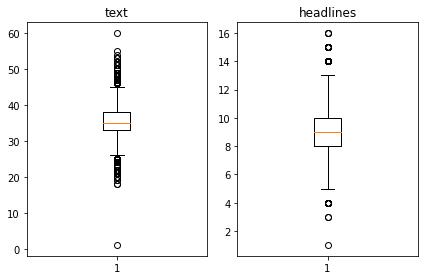

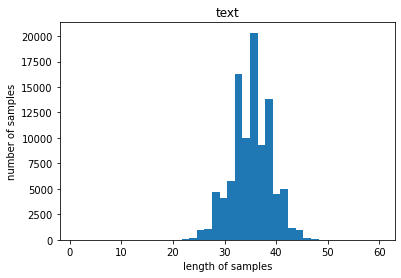

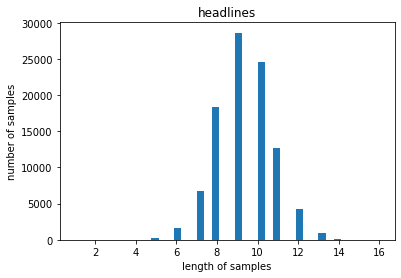

In [15]:
import matplotlib.pyplot as plt

text_len = [len(s.split()) for s in data['text']]
headlines_len = [len(s.split()) for s in data['headlines']]

print('텍스트의 최소 길이 : {}'.format(np.min(text_len)))
print('텍스트의 최대 길이 : {}'.format(np.max(text_len)))
print('텍스트의 평균 길이 : {}'.format(np.mean(text_len)))
print('헤드라인의 최소 길이 : {}'.format(np.min(headlines_len)))
print('헤드라인의 최대 길이 : {}'.format(np.max(headlines_len)))
print('헤드라인의 평균 길이 : {}'.format(np.mean(headlines_len)))

plt.subplot(1,2,1)
plt.boxplot(text_len)
plt.title('text')
plt.subplot(1,2,2)
plt.boxplot(headlines_len)
plt.title('headlines')
plt.tight_layout()
plt.show()

plt.title('text')
plt.hist(text_len, bins = 40)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

plt.title('headlines')
plt.hist(headlines_len, bins = 40)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

#### 텍스트와 헤드라인의 최대 길이 임의 설정

In [16]:
text_max_len = 44
headlines_max_len = 13

#### 임의로 설정한 최대 길이 안에 데이터의 몇 %가 해당하는지 계산하는 함수

In [17]:
def below_threshold_len(max_len, nested_list):
  cnt = 0
  for s in nested_list:
    if(len(s.split()) <= max_len):
        cnt = cnt + 1
  print('전체 샘플 중 길이가 %s 이하인 샘플의 비율: %s'%(max_len, (cnt / len(nested_list))))

In [18]:
below_threshold_len(text_max_len, data['text'])
below_threshold_len(headlines_max_len,  data['headlines'])

전체 샘플 중 길이가 44 이하인 샘플의 비율: 0.9933712891419276
전체 샘플 중 길이가 13 이하인 샘플의 비율: 0.9981699877999186


#### 데이터 정제
* 정해진 길이보다 길면 제외하는 방법으로 데이터 정제하기

In [19]:
data = data[data['text'].apply(lambda x: len(x.split()) <= text_max_len)]
data = data[data['headlines'].apply(lambda x: len(x.split()) <= headlines_max_len)]
print('전체 샘플수 :', (len(data)))

전체 샘플수 : 97528


#### 요약 데이터에 시작 토큰과 종료 토큰 추가하기

In [20]:
data['decoder_input'] = data['headlines'].apply(lambda x : 'sostoken '+ x)
data['decoder_target'] = data['headlines'].apply(lambda x : x + ' eostoken')
data.head()

,headlines,text,decoder_input,decoder_target
0,upgrad learner switches to career in ml al wit...,saurav kant alumnus upgrad iiit pg program mac...,sostoken upgrad learner switches to career in ...,upgrad learner switches to career in ml al wit...
2,new zealand end rohit sharma led india match w...,new zealand defeated india wickets fourth odi ...,sostoken new zealand end rohit sharma led indi...,new zealand end rohit sharma led india match w...
3,aegon life iterm insurance plan helps customer...,aegon life iterm insurance plan customers enjo...,sostoken aegon life iterm insurance plan helps...,aegon life iterm insurance plan helps customer...
4,have known hirani for yrs what if metoo claims...,speaking sexual harassment allegations rajkuma...,sostoken have known hirani for yrs what if met...,have known hirani for yrs what if metoo claims...
5,rahat fateh ali khan denies getting notice for...,pakistani singer rahat fateh ali khan denied r...,sostoken rahat fateh ali khan denies getting n...,rahat fateh ali khan denies getting notice for...


#### Numpy 타입으로 저장

In [21]:
encoder_input = np.array(data['text']) # 인코더의 입력
decoder_input = np.array(data['decoder_input']) # 디코더의 입력
decoder_target = np.array(data['decoder_target']) # 디코더의 레이블
print('=3')

=3


#### 정수 시퀀스 생성 후 Shuffle

In [22]:
indices = np.arange(encoder_input.shape[0])
np.random.shuffle(indices)
print(indices)

[25449 41643 55127 ... 11785 94375 82209]


#### 데이터 Shuffle

In [23]:
encoder_input = encoder_input[indices]
decoder_input = decoder_input[indices]
decoder_target = decoder_target[indices]

In [24]:
n_of_val = int(len(encoder_input)*0.2)
print('테스트 데이터의 수 :', n_of_val)

테스트 데이터의 수 : 19505


In [25]:
encoder_input_train = encoder_input[:-n_of_val]
decoder_input_train = decoder_input[:-n_of_val]
decoder_target_train = decoder_target[:-n_of_val]

encoder_input_test = encoder_input[-n_of_val:]
decoder_input_test = decoder_input[-n_of_val:]
decoder_target_test = decoder_target[-n_of_val:]

print('훈련 데이터의 개수 :', len(encoder_input_train))
print('훈련 레이블의 개수 :', len(decoder_input_train))
print('테스트 데이터의 개수 :', len(encoder_input_test))
print('테스트 레이블의 개수 :', len(decoder_input_test))

훈련 데이터의 개수 : 78023
훈련 레이블의 개수 : 78023
테스트 데이터의 개수 : 19505
테스트 레이블의 개수 : 19505


### 2-5. 데이터 전처리: 정수 인코딩

#### 단어 집합(Vocabulary) 만들기 및 정수 인코딩

#### encoder_input_train

In [26]:
src_tokenizer = Tokenizer()
src_tokenizer.fit_on_texts(encoder_input_train) 

In [27]:
threshold = 7
total_cnt = len(src_tokenizer.word_index) # 단어의 수
rare_cnt = 0 # 등장 빈도수가 threshold보다 작은 단어의 개수를 카운트
total_freq = 0 # 훈련 데이터의 전체 단어 빈도수 총 합
rare_freq = 0 # 등장 빈도수가 threshold보다 작은 단어의 등장 빈도수의 총 합

# 단어와 빈도수의 쌍(pair)을 key와 value로 받는다.
for key, value in src_tokenizer.word_counts.items():
    total_freq = total_freq + value

    # 단어의 등장 빈도수가 threshold보다 작으면
    if(value < threshold):
        rare_cnt = rare_cnt + 1
        rare_freq = rare_freq + value

print('단어 집합(vocabulary)의 크기 :', total_cnt)
print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s'%(threshold - 1, rare_cnt))
print('단어 집합에서 희귀 단어를 제외시킬 경우의 단어 집합의 크기 %s'%(total_cnt - rare_cnt))
print("단어 집합에서 희귀 단어의 비율:", (rare_cnt / total_cnt)*100)
print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", (rare_freq / total_freq)*100)

단어 집합(vocabulary)의 크기 : 69235
등장 빈도가 6번 이하인 희귀 단어의 수: 47174
단어 집합에서 희귀 단어를 제외시킬 경우의 단어 집합의 크기 22061
단어 집합에서 희귀 단어의 비율: 68.1360583519896
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 3.4953453429289154


* 단어 집합의 크기를 20,000으로 제한
* 단어 집합 재생성

In [28]:
src_vocab = 20000
src_tokenizer = Tokenizer(num_words=src_vocab)
src_tokenizer.fit_on_texts(encoder_input_train)

In [29]:
# 텍스트 시퀀스를 정수 시퀀스로 변환
encoder_input_train = src_tokenizer.texts_to_sequences(encoder_input_train) 
encoder_input_test = src_tokenizer.texts_to_sequences(encoder_input_test)

# 잘 진행되었는지 샘플 출력
print(encoder_input_train[:3])

[[5, 63, 2002, 1033, 13, 3, 12, 268, 812, 460, 555, 1055, 24, 1081, 3, 12, 89, 96, 8004, 1118, 1051, 9611, 9, 313, 8621, 15870, 970, 145, 3947, 74, 4296, 8350], [164, 20, 894, 2541, 4149, 2159, 3272, 6089, 18306, 12471, 12865, 181, 1140, 54, 12471, 12865, 594, 63, 5308, 402, 15871, 16591, 839, 1965, 782, 1891, 2557, 20, 67, 206, 1349, 1096, 383], [18, 5309, 3982, 3948, 1394, 10669, 574, 364, 54, 8773, 7624, 251, 143, 10670, 606, 56, 4, 82, 941, 1585, 3948, 9247, 1394, 12472, 879, 740, 509, 82, 3948, 1394, 12472, 981, 3600, 319, 24, 424]]


#### decoder_input_train

In [30]:
tar_tokenizer = Tokenizer()
tar_tokenizer.fit_on_texts(decoder_input_train)

In [31]:
threshold = 6
total_cnt = len(tar_tokenizer.word_index) # 단어의 수
rare_cnt = 0 # 등장 빈도수가 threshold보다 작은 단어의 개수를 카운트
total_freq = 0 # 훈련 데이터의 전체 단어 빈도수 총 합
rare_freq = 0 # 등장 빈도수가 threshold보다 작은 단어의 등장 빈도수의 총 합

# 단어와 빈도수의 쌍(pair)을 key와 value로 받는다.
for key, value in tar_tokenizer.word_counts.items():
    total_freq = total_freq + value

    # 단어의 등장 빈도수가 threshold보다 작으면
    if(value < threshold):
        rare_cnt = rare_cnt + 1
        rare_freq = rare_freq + value

print('단어 집합(vocabulary)의 크기 :', total_cnt)
print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s'%(threshold - 1, rare_cnt))
print('단어 집합에서 희귀 단어를 제외시킬 경우의 단어 집합의 크기 %s'%(total_cnt - rare_cnt))
print("단어 집합에서 희귀 단어의 비율:", (rare_cnt / total_cnt)*100)
print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", (rare_freq / total_freq)*100)

단어 집합(vocabulary)의 크기 : 29925
등장 빈도가 5번 이하인 희귀 단어의 수: 19571
단어 집합에서 희귀 단어를 제외시킬 경우의 단어 집합의 크기 10354
단어 집합에서 희귀 단어의 비율: 65.40016708437761
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 4.660451568454743


In [32]:
tar_vocab = 10000
tar_tokenizer = Tokenizer(num_words=tar_vocab) 
tar_tokenizer.fit_on_texts(decoder_input_train)
tar_tokenizer.fit_on_texts(decoder_target_train)

# 텍스트 시퀀스를 정수 시퀀스로 변환
decoder_input_train = tar_tokenizer.texts_to_sequences(decoder_input_train) 
decoder_target_train = tar_tokenizer.texts_to_sequences(decoder_target_train)
decoder_input_test = tar_tokenizer.texts_to_sequences(decoder_input_test)
decoder_target_test = tar_tokenizer.texts_to_sequences(decoder_target_test)

# 잘 변환되었는지 확인
print('input')
print('input ',decoder_input_train[:5])
print('target')
print('decoder ',decoder_target_train[:5])

input
input  [[1, 38, 526, 5, 99, 5, 685, 3, 553, 62, 26, 5, 309], [1, 66, 3, 6144, 8726, 6, 8727, 8728], [1, 51, 5, 2509, 1117, 25, 10, 284, 3995, 34], [1, 39, 4244, 3, 434, 307, 5181, 9, 333, 14, 2839], [1, 62, 26, 1469, 7, 1564, 285, 1875, 4, 55, 184]]
target
decoder  [[38, 526, 5, 99, 5, 685, 3, 553, 62, 26, 5, 309, 2], [66, 3, 6144, 8726, 6, 8727, 8728, 2], [51, 5, 2509, 1117, 25, 10, 284, 3995, 34, 2], [39, 4244, 3, 434, 307, 5181, 9, 333, 14, 2839, 2], [62, 26, 1469, 7, 1564, 285, 1875, 4, 55, 184, 2]]


In [33]:
drop_train = [index for index, sentence in enumerate(decoder_input_train) if len(sentence) == 1]
drop_test = [index for index, sentence in enumerate(decoder_input_test) if len(sentence) == 1]

print('삭제할 훈련 데이터의 개수 :', len(drop_train))
print('삭제할 테스트 데이터의 개수 :', len(drop_test))

encoder_input_train = [sentence for index, sentence in enumerate(encoder_input_train) if index not in drop_train]
decoder_input_train = [sentence for index, sentence in enumerate(decoder_input_train) if index not in drop_train]
decoder_target_train = [sentence for index, sentence in enumerate(decoder_target_train) if index not in drop_train]

encoder_input_test = [sentence for index, sentence in enumerate(encoder_input_test) if index not in drop_test]
decoder_input_test = [sentence for index, sentence in enumerate(decoder_input_test) if index not in drop_test]
decoder_target_test = [sentence for index, sentence in enumerate(decoder_target_test) if index not in drop_test]

print('훈련 데이터의 개수 :', len(encoder_input_train))
print('훈련 레이블의 개수 :', len(decoder_input_train))
print('테스트 데이터의 개수 :', len(encoder_input_test))
print('테스트 레이블의 개수 :', len(decoder_input_test))

삭제할 훈련 데이터의 개수 : 0
삭제할 테스트 데이터의 개수 : 0
훈련 데이터의 개수 : 78023
훈련 레이블의 개수 : 78023
테스트 데이터의 개수 : 19505
테스트 레이블의 개수 : 19505


#### 패딩하기

In [34]:
encoder_input_train = pad_sequences(encoder_input_train, maxlen=text_max_len, padding='post')
encoder_input_test = pad_sequences(encoder_input_test, maxlen=text_max_len, padding='post')
decoder_input_train = pad_sequences(decoder_input_train, maxlen=headlines_max_len, padding='post')
decoder_target_train = pad_sequences(decoder_target_train, maxlen=headlines_max_len, padding='post')
decoder_input_test = pad_sequences(decoder_input_test, maxlen=headlines_max_len, padding='post')
decoder_target_test = pad_sequences(decoder_target_test, maxlen=headlines_max_len, padding='post')

### 2-6. 모델 설계하기

#### 인코더 설계

In [35]:
from tensorflow.keras.layers import Input, LSTM, Embedding, Dense, Concatenate, TimeDistributed
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint


# 인코더 설계 시작
embedding_dim = 128
hidden_size = 256

# 인코더
encoder_inputs = Input(shape=(text_max_len,))

# 인코더의 임베딩 층
enc_emb = Embedding(src_vocab, embedding_dim)(encoder_inputs)

# 인코더의 LSTM 1
encoder_lstm1 = LSTM(hidden_size, return_sequences=True, return_state=True ,dropout = 0.4, recurrent_dropout = 0.4)
encoder_output1, state_h1, state_c1 = encoder_lstm1(enc_emb)

# 인코더의 LSTM 2
encoder_lstm2 = LSTM(hidden_size, return_sequences=True, return_state=True, dropout=0.4, recurrent_dropout=0.4)
encoder_output2, state_h2, state_c2 = encoder_lstm2(encoder_output1)

# 인코더의 LSTM 3
encoder_lstm3 = LSTM(hidden_size, return_state=True, return_sequences=True, dropout=0.4, recurrent_dropout=0.4)
encoder_outputs, state_h, state_c= encoder_lstm3(encoder_output2)

#### 디코더 설계

In [36]:
# 디코더 설계
decoder_inputs = Input(shape=(None,))

# 디코더의 임베딩 층
dec_emb_layer = Embedding(tar_vocab, embedding_dim)
dec_emb = dec_emb_layer(decoder_inputs)

# 디코더의 LSTM
decoder_lstm = LSTM(hidden_size, return_sequences=True, return_state=True, dropout=0.4, recurrent_dropout=0.2)
decoder_outputs, _, _ = decoder_lstm(dec_emb, initial_state=[state_h, state_c])

In [37]:
# 디코더의 출력층
decoder_softmax_layer = Dense(tar_vocab, activation='softmax')
decoder_softmax_outputs = decoder_softmax_layer(decoder_outputs) 

# 모델 정의
model = Model([encoder_inputs, decoder_inputs], decoder_softmax_outputs)
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 44)]         0                                            
__________________________________________________________________________________________________
embedding (Embedding)           (None, 44, 128)      2560000     input_1[0][0]                    
__________________________________________________________________________________________________
lstm (LSTM)                     [(None, 44, 256), (N 394240      embedding[0][0]                  
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, None)]       0                                            
______________________________________________________________________________________________

### 2-7. 어텐션 메커니즘 사용하기 (추상적 요약)

In [38]:
from tensorflow.keras.layers import AdditiveAttention

# 어텐션 층(어텐션 함수)
attn_layer = AdditiveAttention(name='attention_layer')

# 인코더와 디코더의 모든 time step의 hidden state를 어텐션 층에 전달하고 결과를 리턴
attn_out = attn_layer([decoder_outputs, encoder_outputs])


# 어텐션의 결과와 디코더의 hidden state들을 연결
decoder_concat_input = Concatenate(axis=-1, name='concat_layer')([decoder_outputs, attn_out])

# 디코더의 출력층
decoder_softmax_layer = Dense(tar_vocab, activation='softmax')
decoder_softmax_outputs = decoder_softmax_layer(decoder_concat_input)

# 모델 정의
model = Model([encoder_inputs, decoder_inputs], decoder_softmax_outputs)
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 44)]         0                                            
__________________________________________________________________________________________________
embedding (Embedding)           (None, 44, 128)      2560000     input_1[0][0]                    
__________________________________________________________________________________________________
lstm (LSTM)                     [(None, 44, 256), (N 394240      embedding[0][0]                  
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, None)]       0                                            
____________________________________________________________________________________________

### 2-8. 모델 훈련하기

In [39]:
model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy')
es = EarlyStopping(monitor='val_loss', patience=2, verbose=1)
history = model.fit(x=[encoder_input_train, decoder_input_train], y=decoder_target_train, \
          validation_data=([encoder_input_test, decoder_input_test], decoder_target_test), \
          batch_size=256, callbacks=[es], epochs=50)

Epoch 1/50
305/305 [==============================] - 209s 632ms/step - loss: 5.2405 - val_loss: 4.8250
Epoch 2/50
305/305 [==============================] - 191s 625ms/step - loss: 4.6805 - val_loss: 4.4587
Epoch 3/50
305/305 [==============================] - 189s 621ms/step - loss: 4.3470 - val_loss: 4.2005
Epoch 4/50
305/305 [==============================] - 188s 617ms/step - loss: 4.1051 - val_loss: 4.0371
Epoch 5/50
305/305 [==============================] - 188s 616ms/step - loss: 3.9205 - val_loss: 3.9132
Epoch 6/50
305/305 [==============================] - 187s 614ms/step - loss: 3.7678 - val_loss: 3.8130
Epoch 7/50
305/305 [==============================] - 187s 612ms/step - loss: 3.6385 - val_loss: 3.7339
Epoch 8/50
305/305 [==============================] - 186s 611ms/step - loss: 3.5263 - val_loss: 3.6717
Epoch 9/50
305/305 [==============================] - 187s 613ms/step - loss: 3.4246 - val_loss: 3.6126
Epoch 10/50
305/305 [==============================] - 187s 614m

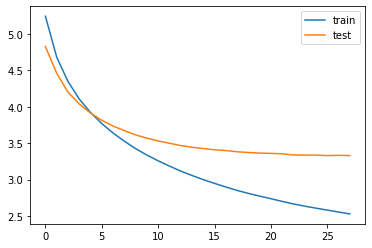

In [40]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

#### 인퍼런스 모델 구현하기
* seq2seq는 훈련할 때와 실제 동작할 때(인퍼런스 단계)의 방식이 다르므로 그에 맞게 모델 설계를 별개로 진행해야 함


In [41]:
src_index_to_word = src_tokenizer.index_word # 원문 단어 집합에서 정수 -> 단어를 얻음
tar_word_to_index = tar_tokenizer.word_index # 요약 단어 집합에서 단어 -> 정수를 얻음
tar_index_to_word = tar_tokenizer.index_word # 요약 단어 집합에서 정수 -> 단어를 얻음

In [42]:
# 인코더 설계
encoder_model = Model(inputs=encoder_inputs, outputs=[encoder_outputs, state_h, state_c])

# 이전 시점의 상태들을 저장하는 텐서
decoder_state_input_h = Input(shape=(hidden_size,))
decoder_state_input_c = Input(shape=(hidden_size,))

dec_emb2 = dec_emb_layer(decoder_inputs)

# 문장의 다음 단어를 예측하기 위해서 초기 상태(initial_state)를 이전 시점의 상태로 사용. 이는 뒤의 함수 decode_sequence()에 구현
# 훈련 과정에서와 달리 LSTM의 리턴하는 은닉 상태와 셀 상태인 state_h와 state_c를 버리지 않음.
decoder_outputs2, state_h2, state_c2 = decoder_lstm(dec_emb2, initial_state=[decoder_state_input_h, decoder_state_input_c])

In [43]:
# 어텐션 함수
decoder_hidden_state_input = Input(shape=(text_max_len, hidden_size))
attn_out_inf = attn_layer([decoder_outputs2, decoder_hidden_state_input])
decoder_inf_concat = Concatenate(axis=-1, name='concat')([decoder_outputs2, attn_out_inf])

# 디코더의 출력층
decoder_outputs2 = decoder_softmax_layer(decoder_inf_concat) 

# 최종 디코더 모델
decoder_model = Model(
    [decoder_inputs] + [decoder_hidden_state_input,decoder_state_input_h, decoder_state_input_c],
    [decoder_outputs2] + [state_h2, state_c2])

In [47]:
def decode_sequence(input_seq):
    # 입력으로부터 인코더의 상태를 얻음
    e_out, e_h, e_c = encoder_model.predict(input_seq)

     # <SOS>에 해당하는 토큰 생성
    target_seq = np.zeros((1,1))
    target_seq[0, 0] = tar_word_to_index['sostoken']

    stop_condition = False
    decoded_sentence = ''
    while not stop_condition: # stop_condition이 True가 될 때까지 루프 반복

        output_tokens, h, c = decoder_model.predict([target_seq] + [e_out, e_h, e_c])
        sampled_token_index = np.argmax(output_tokens[0, -1, :])
        sampled_token = tar_index_to_word[sampled_token_index]

        if (sampled_token!='eostoken'):
            decoded_sentence += ' '+sampled_token

        #  <eos>에 도달하거나 최대 길이를 넘으면 중단.
        if (sampled_token == 'eostoken'  or len(decoded_sentence.split()) >= (headlines_max_len-1)):
            stop_condition = True

        # 길이가 1인 타겟 시퀀스를 업데이트
        target_seq = np.zeros((1,1))
        target_seq[0, 0] = sampled_token_index

        # 상태를 업데이트 합니다.
        e_h, e_c = h, c

    return decoded_sentence

In [48]:
# 원문의 정수 시퀀스를 텍스트 시퀀스로 변환
def seq2text(input_seq):
    temp=''
    for i in input_seq:
        if (i!=0):
            temp = temp + src_index_to_word[i]+' '
    return temp

# 요약문의 정수 시퀀스를 텍스트 시퀀스로 변환
def seq2summary(input_seq):
    temp=''
    for i in input_seq:
        if ((i!=0 and i!=tar_word_to_index['sostoken']) and i!=tar_word_to_index['eostoken']):
            temp = temp + tar_index_to_word[i] + ' '
    return temp

print('=3')

=3


### 2-9. 실제 결과와 요약문 비교하기 (추상적 요약)

In [49]:
for i in range(50, 100):
    print("원문 :", seq2text(encoder_input_test[i]))
    print("실제 요약 :", seq2summary(decoder_input_test[i]))
    print("예측 요약 :", decode_sequence(encoder_input_test[i].reshape(1, text_max_len)))
    print("\n")

원문 : digital currency bitcoin reached new time high rising thursday market capitalisation rising billion since monday taken cryptocurrency valuation billion overall price bitcoin risen since beginning year 
실제 요약 : bitcoin gains crore in days to hit all time high 
예측 요약 :  bitcoin price hits month high of the biggest ever


원문 : sara ali khan revealed fake instagram account uses like posts secretly hot models course normal person sara said stalking people social media asked twitter sara replied false name come twitter soon 
실제 요약 : have fake instagram account where like hot models sara 
예측 요약 :  sara ali khan reveals media dating her account report


원문 : pakistan based terror groups planning attack india afghanistan daniel director us national intelligence said islamabad failed curb militants terrorists pakistan added pakistan likely turn china offset international isolation empowering relationship help beijing project influence indian ocean said 
실제 요약 : pak based terrorists plan to 

### 2-10. Summa을 이용해서 추출적 요약해보기

In [50]:
import requests
from summa.summarizer import summarize

#### 데이터프레임으로 정리 후 요약

In [51]:
urllib.request.urlretrieve("https://raw.githubusercontent.com/sunnysai12345/News_Summary/master/news_summary_more.csv", filename="news_summary_more.csv")
data = pd.read_csv('news_summary_more.csv', encoding='iso-8859-1')

In [52]:
data['summary'] = data['text'].apply(lambda x: summarize(x, ratio=0.45))

In [53]:
data.sample(10)

,headlines,text,summary
31511,Buttler's 4th straight 50+ score helps RR regi...,Wicketkeeper-batsman Jos Buttler slammed an un...,Wicketkeeper-batsman Jos Buttler slammed an un...
76076,FBI hacks alleged 'sextortionist' with a fake ...,The Federal Bureau of Investigation (FBI) this...,The FBI used a fake video containing a code to...
52771,US man charged for using malware to spy on use...,The US Department of Justice (DOJ) has charged...,The US Department of Justice (DOJ) has charged...
37313,Man arrested in connection to rapper XXXTentac...,A man named Dedrick D Williams was arrested on...,A man named Dedrick D Williams was arrested on...
35196,"NYT, New Yorker win Pulitzer for reporting abu...",The New York Times and The New Yorker magazine...,The New York Times also won Pulitzers in the n...
14796,"Engineer gets 800% return on Aston Martin IPO,...",Kuwait's 66-year-old civil engineer Najeeb Al-...,Kuwait's 66-year-old civil engineer Najeeb Al-...
87061,"Khans, Johar reason for Twitter account suspen...",Singer Abhijeet Bhattacharya has claimed that ...,
86981,Fosun VC scouting India for Tech Investments: ...,"Fosun, a Chinese conglomerate managing over $1...","Ajay Lakhotia, Partner at Fosun VC said, Ã¢ÂÂ..."
30754,Two-thirds of world population to live in citi...,Two-thirds of people in the world will be livi...,It further stated that India's Delhi will be t...
88806,United Airlines employee leaks cockpit access ...,A United Airlines flight attendant inadvertent...,A United Airlines flight attendant inadvertent...


In [54]:
for i in range(10):
    print("원문 :", data['text'][i])
    print("실제 요약 :", data['headlines'][i])
    print("추출 요약 :", data['summary'][i])
    print("\n")

원문 : Saurav Kant, an alumnus of upGrad and IIIT-B's PG Program in Machine learning and Artificial Intelligence, was a Sr Systems Engineer at Infosys with almost 5 years of work experience. The program and upGrad's 360-degree career support helped him transition to a Data Scientist at Tech Mahindra with 90% salary hike. upGrad's Online Power Learning has powered 3 lakh+ careers.
실제 요약 : upGrad learner switches to career in ML & Al with 90% salary hike
추출 요약 : upGrad's Online Power Learning has powered 3 lakh+ careers.


원문 : Kunal Shah's credit card bill payment platform, CRED, gave users a chance to win free food from Swiggy for one year. Pranav Kaushik, a Delhi techie, bagged this reward after spending 2000 CRED coins. Users get one CRED coin per rupee of bill paid, which can be used to avail rewards from brands like Ixigo, BookMyShow, UberEats, Cult.Fit and more.
실제 요약 : Delhi techie wins free food from Swiggy for one year on CRED
추출 요약 : Users get one CRED coin per rupee of bill pai

## 3. 회고

### 3-1. 최종정리
* 추출적 요약이 가독성, 즉 사람이 만든것 같이 자연스러운 문장처럼 보이는게 부족하다고하는데, 제 영어가 문제인지, 모델 설계가 문제인지, 제 눈에는 추상적 요약이 더 어색한 것처럼 느껴집니다
* 추상적 요약과 추출적 요약의 개념에 대해 확실히 이해하고, 실제로 설계 후 실행을 시켜보았다는데에 의의를 두고 이 프로젝트는 마무리하게 되었습니다.


### 3-2. 이번 프로젝트에서 어려웠던 점
* NLP가 아직은 많이 어렵습니다.🥲 특히 이번 프로젝트는 인코더/디코더라는 모델 설계 개념을 제대로 이해해야 할 수 있어서 아직 개념이 잡히지 않은 상태에서 하려니 더 쉽지 않았습니다.
* 추상적 요약, 추출적 요약에 대한 개념은 이해가 되지만 그걸 구현해내는 과정이 어려웠습니다.      
* 영어인데다 잘 모르는 내용이라 제대로 훈련이 되고 요약이 되었는지 알기가 쉽지 않았습니다.
<br/>
<br/>

### 3-3. 프로젝트를 진행하면서 알아낸 점, 혹은 아직 모호한 점
* 그동안 모델 훈련하며 어떤 과정으로 진행되는지 모호했던 개념에 대해 정리할 수 있어 좋았습니다. 
* 텍스트 요약도 여러 방법으로 할 수 있다는 것을 알게 되었습니다.   
* 한국어로도 가능하다고하는데, 아직 시도는 못해봐서 시간을 내서 꼭 해봐야겠다고 생각했습니다.
<br/>
<br/>

### 3-4. 앞으로 더 공부할 내용
* 한글 Text Summarization   
* 텍스트 요약, 인코더/디코더
<br/>
<br/>


### 3-5. 참고사이트

* Python requests 모듈 사용법   
https://me2nuk.com/Python-requests-module-example/  


* 어텐션을 이용한 텍스트 요약   
https://wikidocs.net/72820


* summa    
https://pypi.org/project/summa/


* DeepTitle: 한국어 기사 자동 요약     
https://www.slideshare.net/BOAZbigdata/deeptitle?fbclid=IwAR2GHvEwLC-cvnlbjhvbKc0dxT7Xyof0CjooXvrcejqJoPN_cFLk6ewbMjQ



